In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

Loading the data

In [5]:
df = pd.read_csv("b_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Preprocessing

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.size

18777

In [10]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

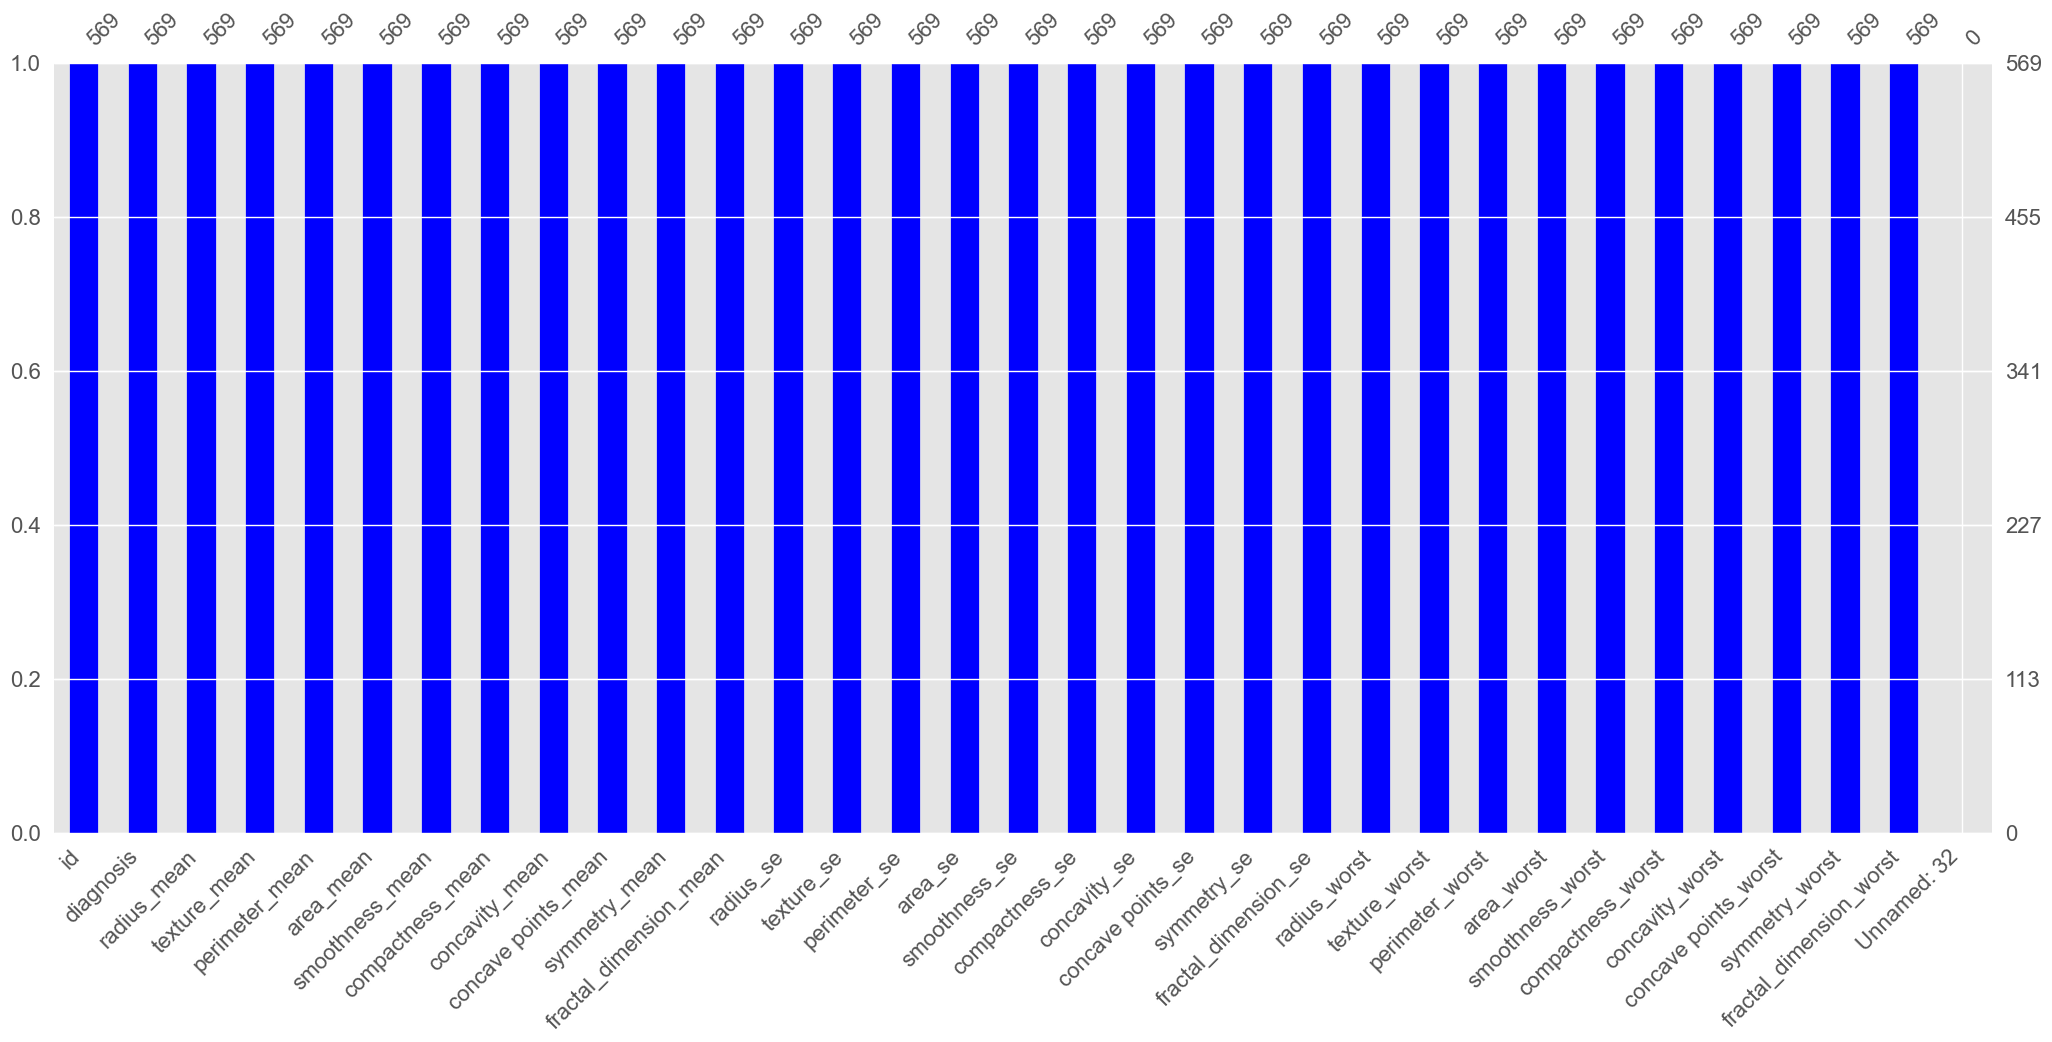

In [12]:
msno.bar(df, color="blue")
plt.show()

In [13]:
df['diagnosis'] = df ['diagnosis'].apply(lambda val:1 if val=='M' else 0)

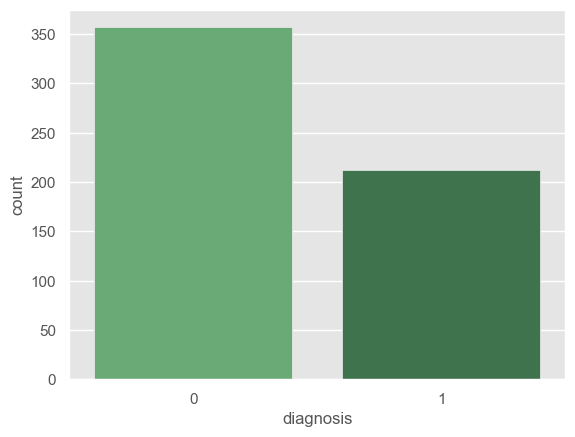

In [14]:
sns.countplot(x='diagnosis',data=df,palette='Greens_d')
plt.show()

Exploratory Data Analysis

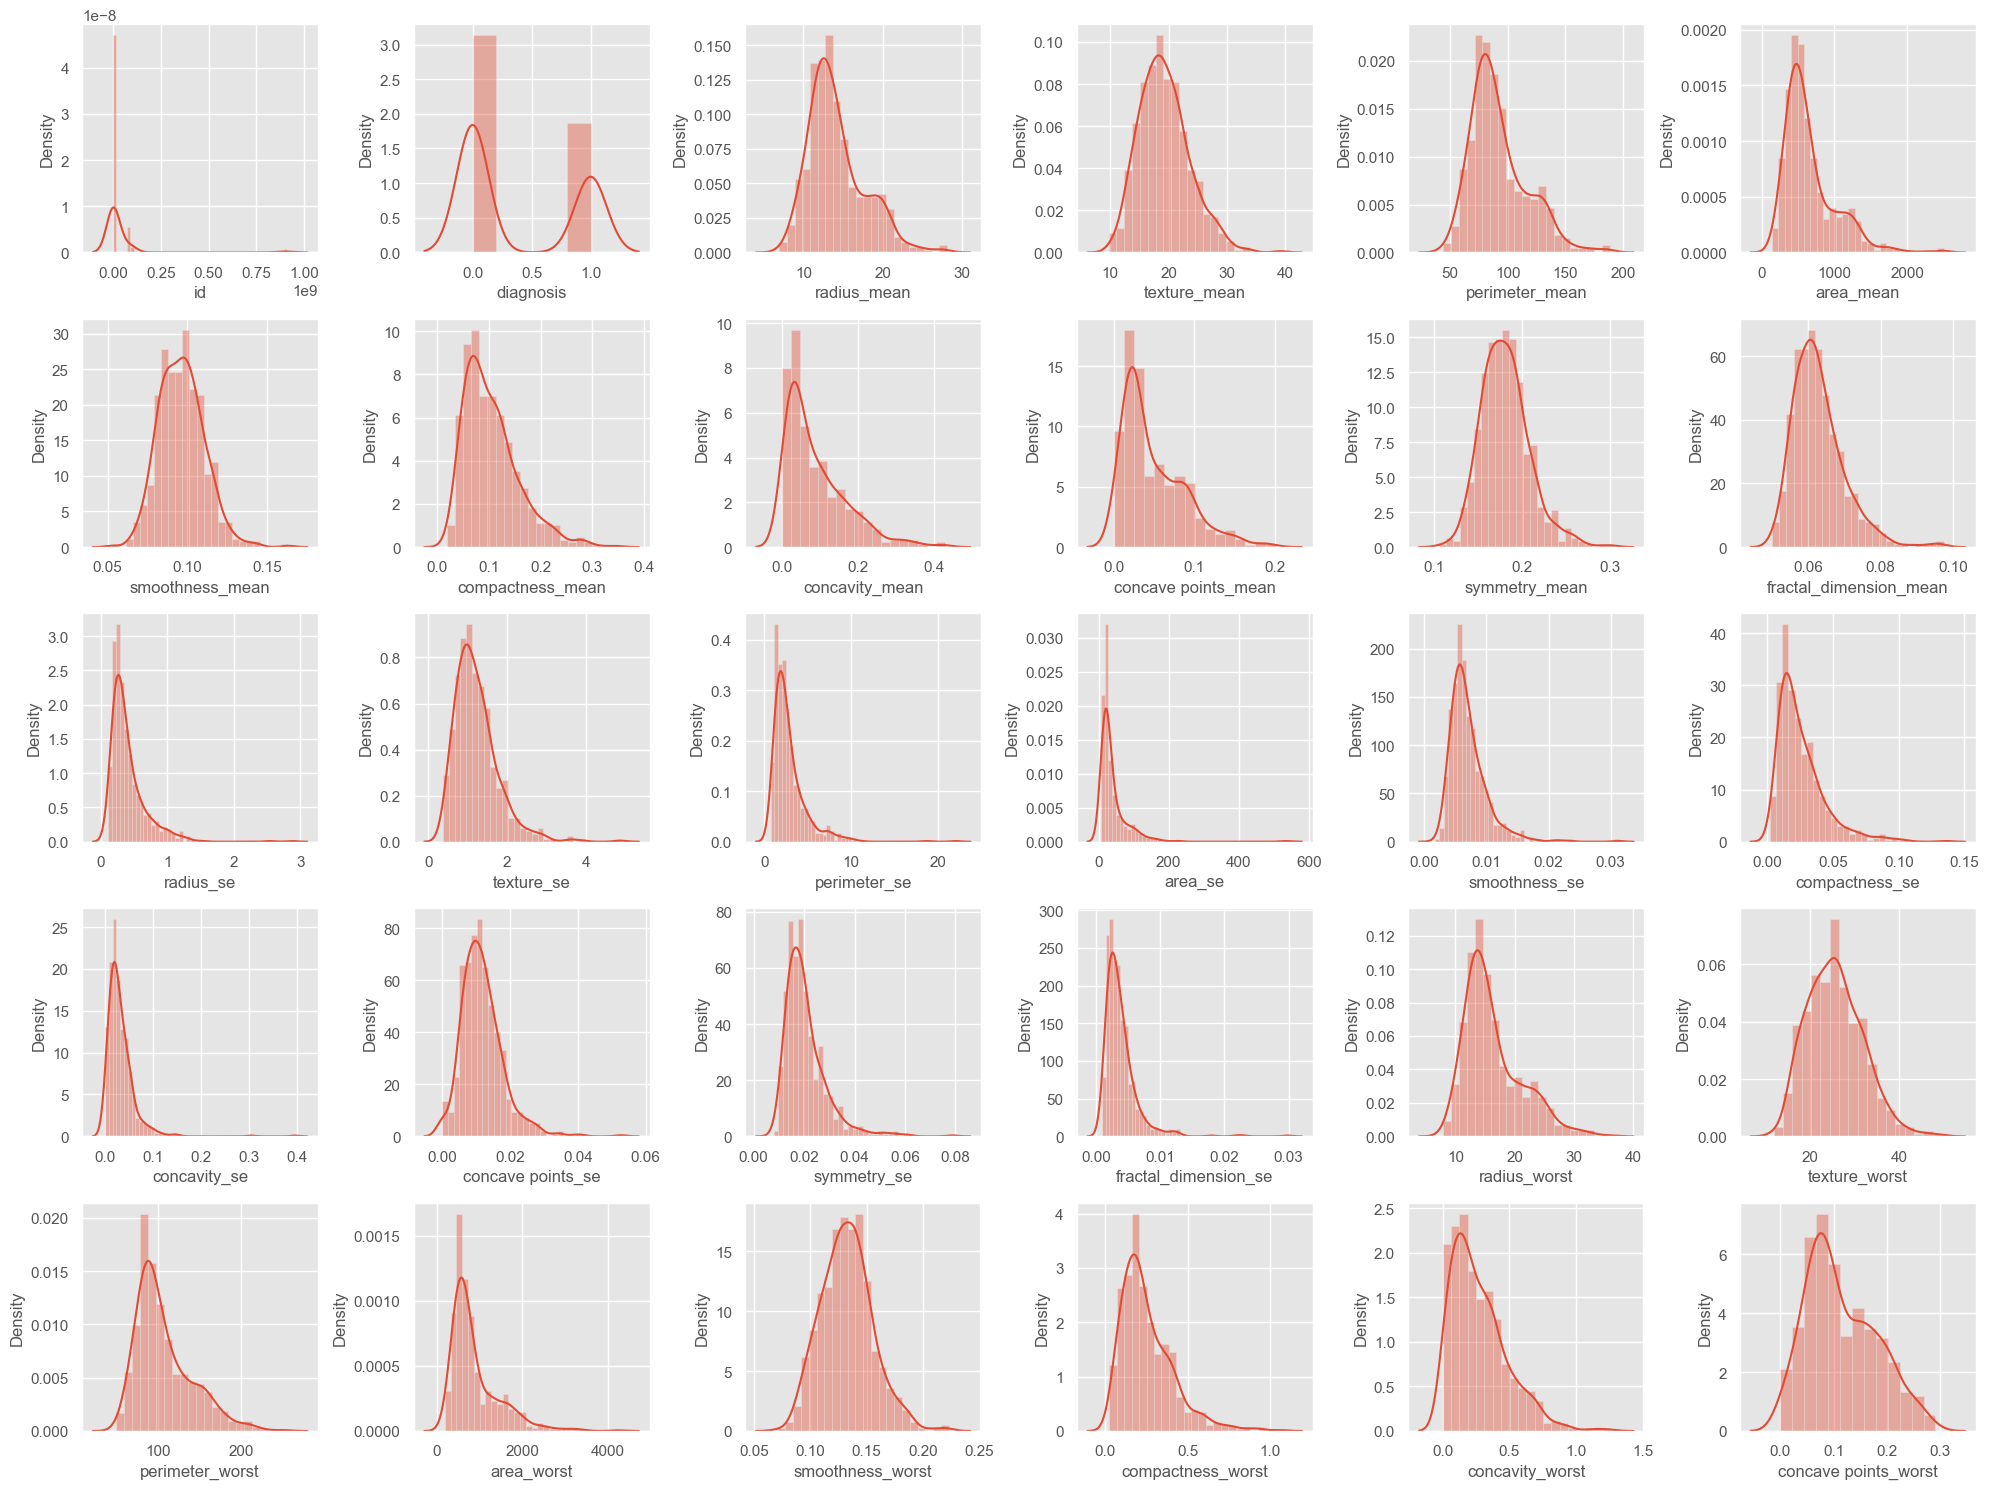

In [15]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

In [16]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


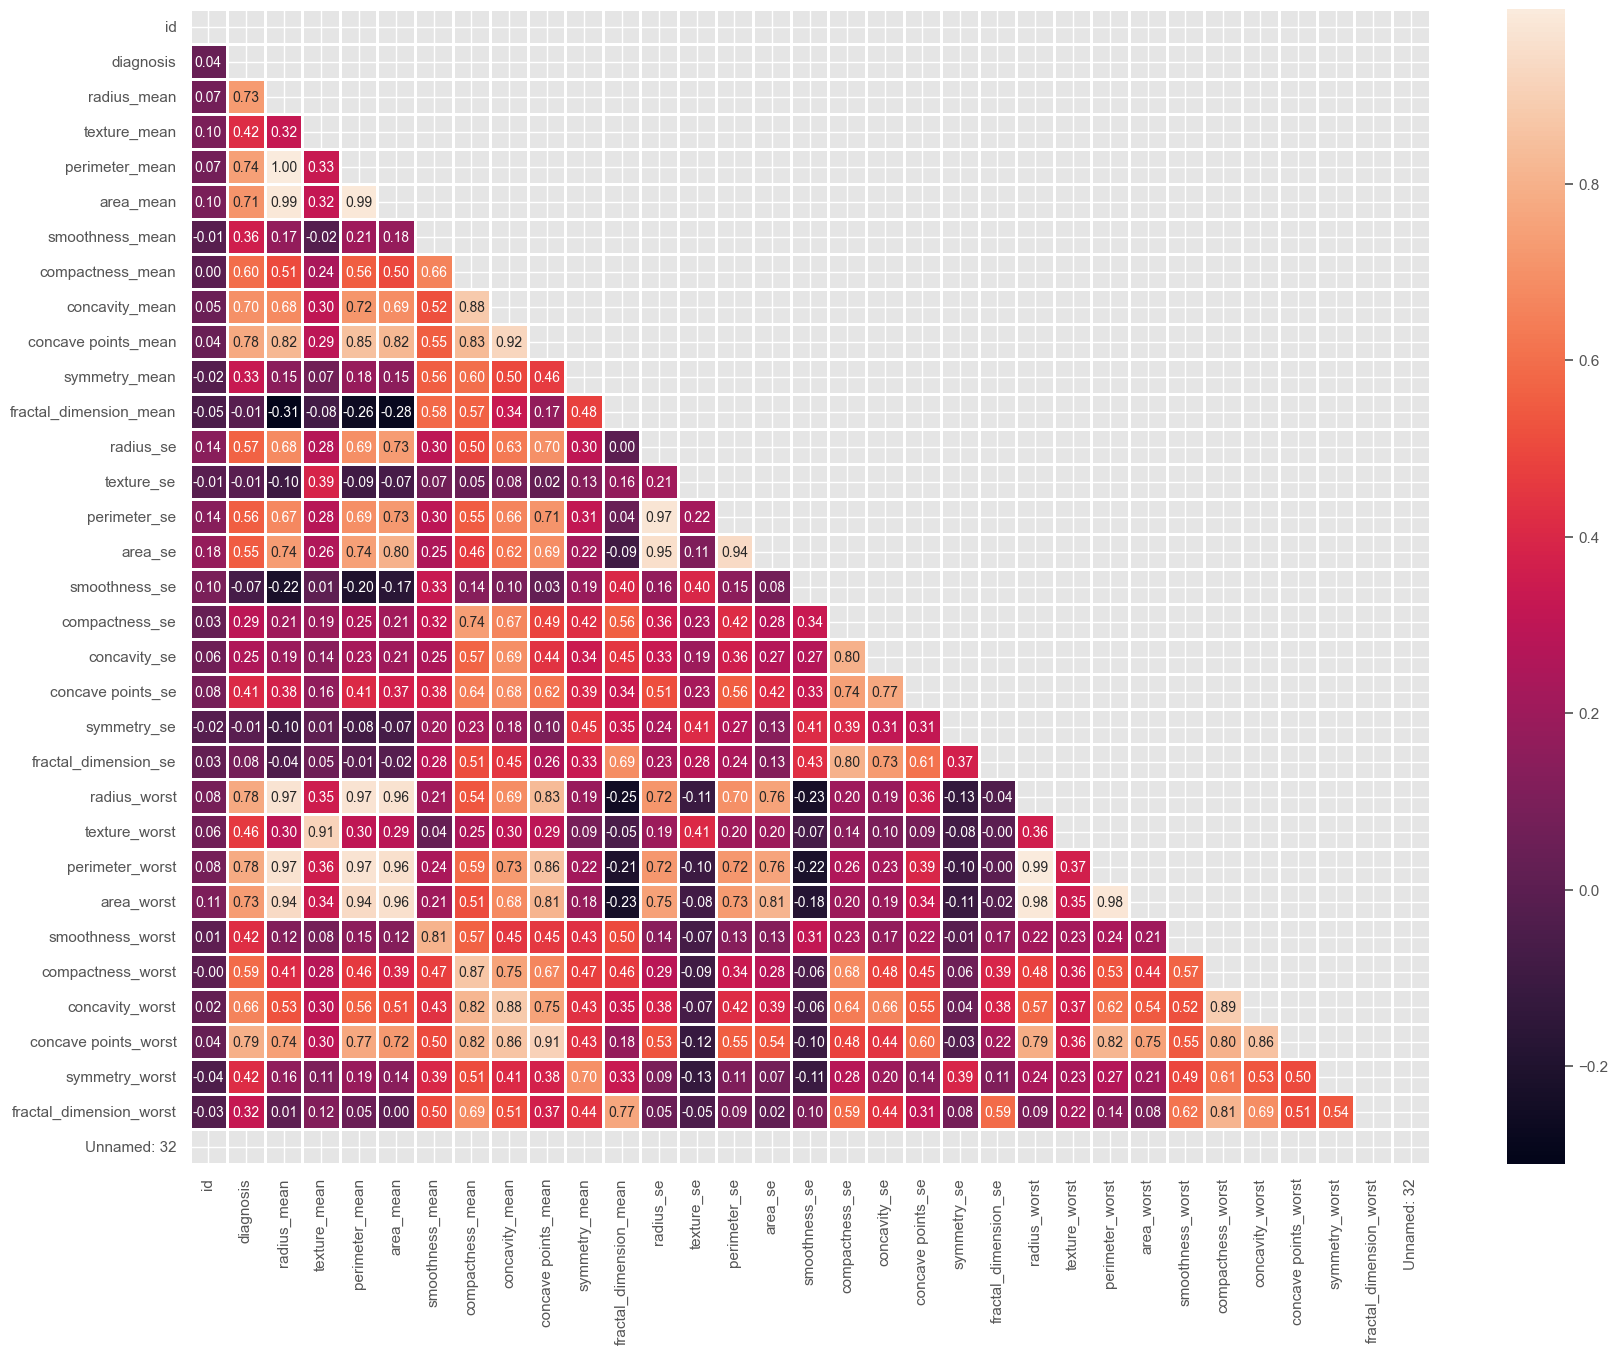

In [17]:
plt.figure(figsize=(20,15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f")
plt.show()

In [18]:
corr_matrix = df.corr().abs()

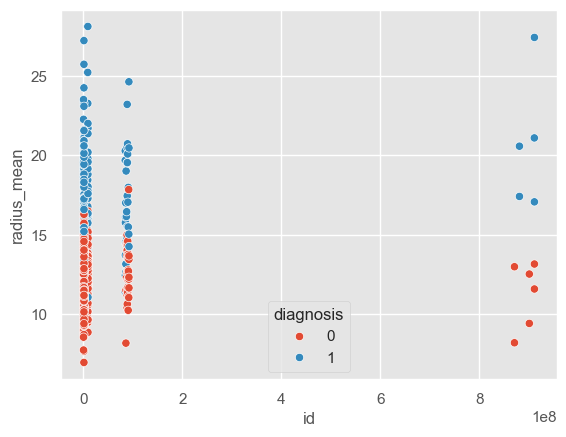

In [19]:
sns.scatterplot(x='id',y='radius_mean',data=df,hue='diagnosis')
plt.show()

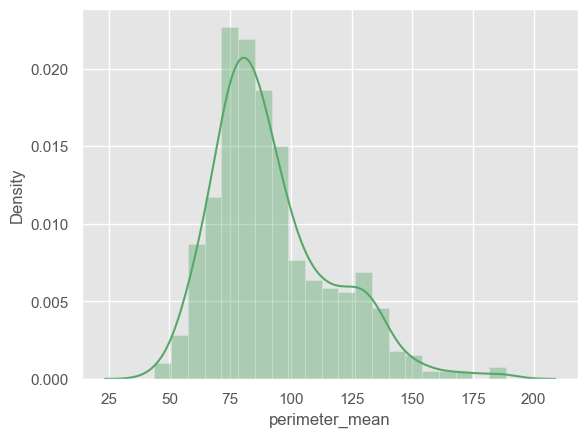

In [20]:
sns.distplot(df.perimeter_mean,kde=True,color='g')
plt.show()

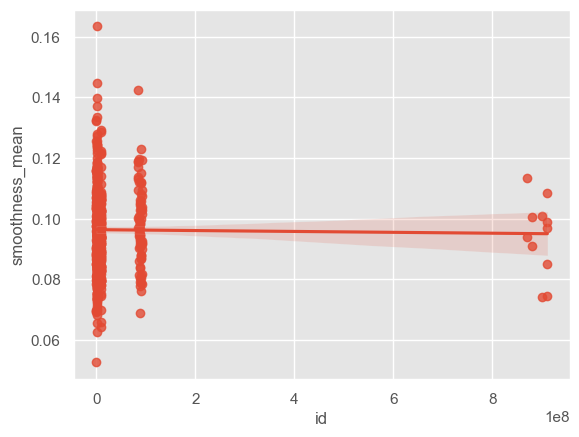

In [21]:
sns.regplot(x='id',y='smoothness_mean',data=df)
plt.show()

In [22]:
df.drop('id', axis=1, inplace=True)

Feature Selection

In [23]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.92)]
df = df.drop(to_drop, axis=1)
print(df.shape[1])

24


In [24]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.drop(df.columns[-1], axis=1, inplace=True)
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
x= df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [27]:
x.head()

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
x_train.shape

(455, 22)

Machine Learning Algorithm

Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(x_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(x_test))
print(log_reg_acc)
y_pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



K-Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, knn.predict(x_train)))
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(knn_acc)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.967032967032967
0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Support Vector Classifier

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability=True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [39]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [40]:
grid_search.best_score_

np.float64(0.9802197802197803)

In [41]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(x_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [42]:
y_pred = svc.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, svc.predict(x_train)))
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(svc_acc)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}
grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [45]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'random'}

In [46]:
grid_search_dt.best_score_

np.float64(0.9582417582417582)

In [47]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [48]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, dtc.predict(x_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
print(dtc_acc)
y_pred = dtc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9692307692307692
0.9649122807017544
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [51]:
y_pred = rand_clf.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(x_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(x_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9824561403508771
[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(x_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [54]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 180}

In [55]:
grid_search_gbc.best_score_

np.float64(0.9582850297550043)

In [56]:
gbc = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=180)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, gbc.predict(x_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(x_test))
print(gbc_acc)
y_pred = gbc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9736842105263158
[[65  2]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



XGBoost Classifier

In [60]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(x_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(x_test))
print(xgb_acc)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9934065934065934
0.956140350877193
[[65  2]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [63]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,98.25
4,Random Forest Classifier,98.25
5,Gradient Boosting Classifier,97.37
3,Decision Tree Classifier,96.49
0,Logistic Regression,96.49
1,KNN,95.61
6,XgBoost,95.61


In [64]:
import pickle
model = svc
pickle.dump(model, open("brest_cancer.pkl","wb"))

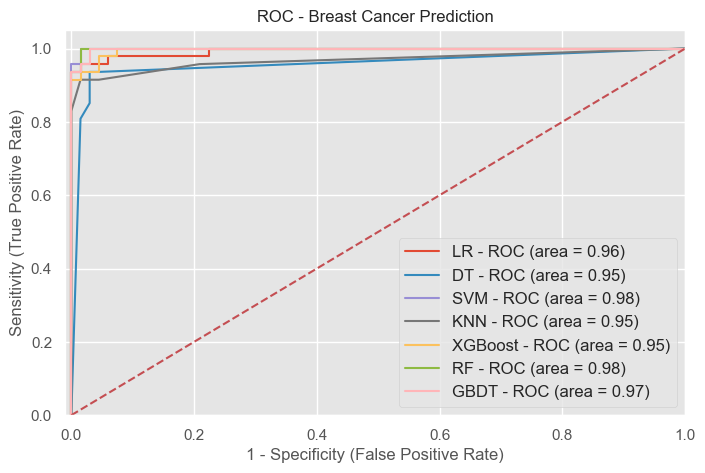

In [66]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [68]:
x

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [69]:
def get_float_input(prompt):
    user_input = input(prompt)
    try:
        return float(user_input)
    except ValueError:
        print(f"Invalid input: '{user_input}' is not a float")
        return get_float_input(prompt)

# Collecting input values
texture_mean = get_float_input("Enter the Texture Mean: ")
smoothness_mean = get_float_input("Enter the Smoothness Mean: ")
compactness_mean = get_float_input("Enter the Compactness Mean: ")
concave_points_mean = get_float_input("Enter the Concave Points Mean: ")
symmetry_mean = get_float_input("Enter the Symmetry Mean: ")
fractal_dimension_mean = get_float_input("Enter the Fractal Dimension Mean: ")

texture_se = get_float_input("Enter the Texture SE: ")
area_se = get_float_input("Enter the Area SE: ")
smoothness_se = get_float_input("Enter the Smoothness SE: ")
compactness_se = get_float_input("Enter the Compactness SE: ")
concavity_se = get_float_input("Enter the Concavity SE: ")
concave_points_se = get_float_input("Enter the Concave Points SE: ")
symmetry_se = get_float_input("Enter the Symmetry SE: ")
fractal_dimension_se = get_float_input("Enter the Fractal Dimension SE: ")

texture_worst = get_float_input("Enter the Texture Worst: ")
area_worst = get_float_input("Enter the Area Worst: ")
smoothness_worst = get_float_input("Enter the Smoothness Worst: ")
compactness_worst = get_float_input("Enter the Compactness Worst: ")
concavity_worst = get_float_input("Enter the Concavity Worst: ")
concave_points_worst = get_float_input("Enter the Concave Points Worst: ")
symmetry_worst = get_float_input("Enter the Symmetry Worst: ")
fractal_dimension_worst = get_float_input("Enter the Fractal Dimension Worst: ")

# Creating the input data list
input_data = [
    texture_mean, smoothness_mean, compactness_mean, concave_points_mean,
    symmetry_mean, fractal_dimension_mean, texture_se, area_se, smoothness_se,
    compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se,
    texture_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst,
    concave_points_worst, symmetry_worst, fractal_dimension_worst
]

# Reshape the input_data to fit the scaler's expected input format
input_data_reshaped = [input_data]

# Transforming the input data using the scaler
data_input = scaler.transform(input_data_reshaped)

# Display the transformed data
print("Transformed input data:", data_input)


Transformed input data: [[ 6.26978205e+00  4.72306124e+03  1.12045754e+04  6.78285306e+02
   2.04689853e+03  8.21239552e+03  2.58422893e+01  1.24048612e-01
   5.28748564e+04  1.49652161e+03  4.96172246e+03  9.87798097e+03
   9.58529989e+03  5.82943676e+03  7.03259956e+01 -1.41201640e+00
   1.16839473e+04  9.77379265e+01  2.70449554e+02  2.36150077e+03
   1.03605551e+04  1.49042651e+05]]


In [70]:
model_prediction = model.predict(data_input)
model_prediction

array([1])

In [71]:
if model_prediction[0] == 0:
    print("Benign (Not Cancerous)")
else:
    print("Malignant (Cancerous)")

Malignant (Cancerous)


In [72]:
def cancer_prediction(input_data):
    data_input = scaler.transform([input_data])
    model_prediction = model.predict(data_input)
    if model_prediction[0] == 0:
        return "Benign (Not Cancerous)"
    else:
        return "Malignant (Cancerous)"

In [73]:
texture_mean = get_float_input("Enter the Texture Mean: ")
smoothness_mean = get_float_input("Enter the Smoothness Mean: ")
compactness_mean = get_float_input("Enter the Compactness Mean: ")
concave_points_mean = get_float_input("Enter the Concave Points Mean: ")
symmetry_mean = get_float_input("Enter the Symmetry Mean: ")
fractal_dimension_mean = get_float_input("Enter the Fractal Dimension Mean: ")

texture_se = get_float_input("Enter the Texture SE: ")
area_se = get_float_input("Enter the Area SE: ")
smoothness_se = get_float_input("Enter the Smoothness SE: ")
compactness_se = get_float_input("Enter the Compactness SE: ")
concavity_se = get_float_input("Enter the Concavity SE: ")
concave_points_se = get_float_input("Enter the Concave Points SE: ")
symmetry_se = get_float_input("Enter the Symmetry SE: ")
fractal_dimension_se = get_float_input("Enter the Fractal Dimension SE: ")

texture_worst = get_float_input("Enter the Texture Worst: ")
area_worst = get_float_input("Enter the Area Worst: ")
smoothness_worst = get_float_input("Enter the Smoothness Worst: ")
compactness_worst = get_float_input("Enter the Compactness Worst: ")
concavity_worst = get_float_input("Enter the Concavity Worst: ")
concave_points_worst = get_float_input("Enter the Concave Points Worst: ")
symmetry_worst = get_float_input("Enter the Symmetry Worst: ")
fractal_dimension_worst = get_float_input("Enter the Fractal Dimension Worst: ")

input_data = [
    texture_mean, smoothness_mean, compactness_mean, concave_points_mean,
    symmetry_mean, fractal_dimension_mean, texture_se, area_se, smoothness_se,
    compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se,
    texture_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst,
    concave_points_worst, symmetry_worst, fractal_dimension_worst
]

cancer_prediction(input_data)

'Benign (Not Cancerous)'